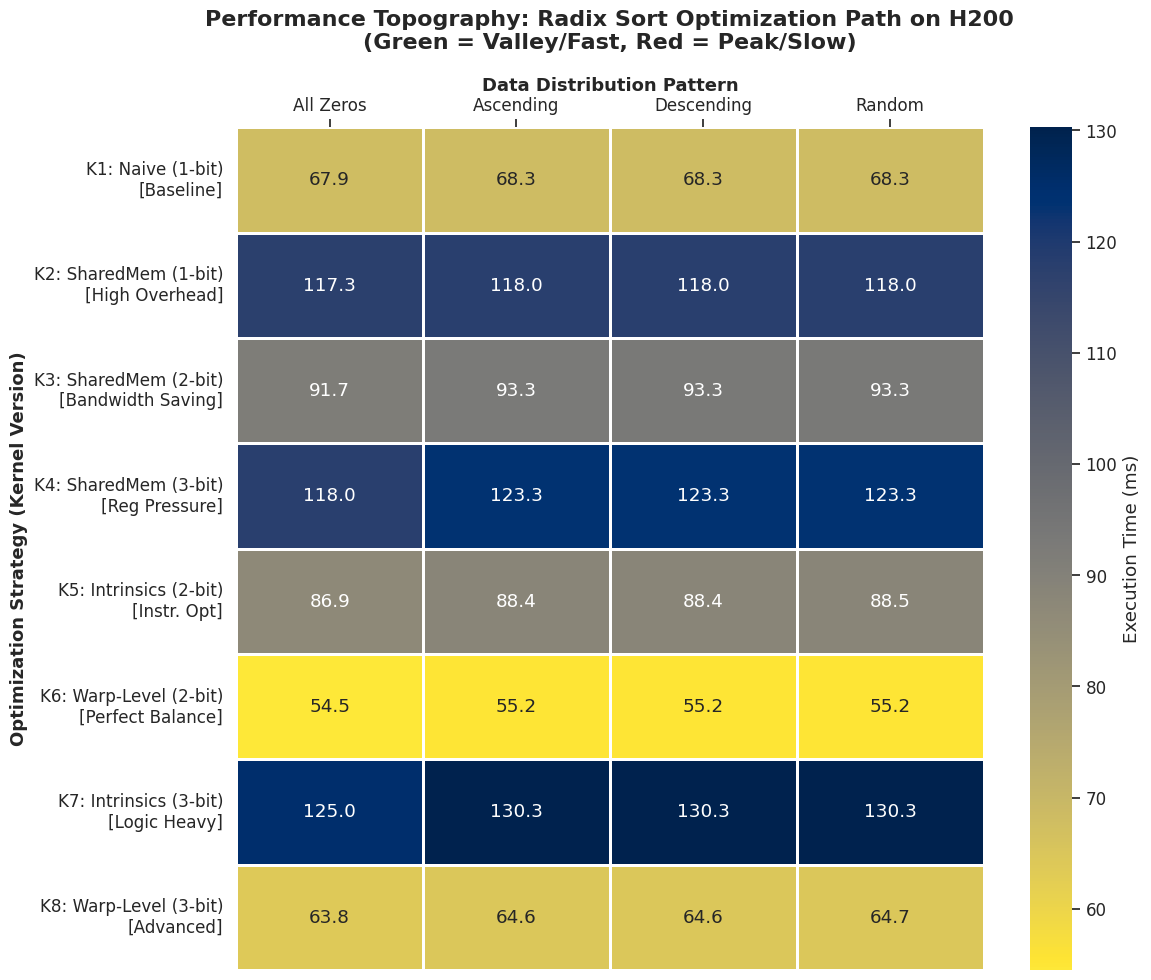

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 准备详细数据
data_matrix = [
    [67.89, 68.35, 68.35, 68.35],   # K1
    [117.32, 118.00, 118.00, 118.00], # K2
    [91.69, 93.26, 93.31, 93.31],   # K3
    [117.96, 123.28, 123.29, 123.31], # K4
    [86.91, 88.44, 88.44, 88.45],   # K5
    [54.51, 55.23, 55.23, 55.23],   # K6
    [124.95, 130.26, 130.26, 130.27], # K7
    [63.81, 64.64, 64.64, 64.65]    # K8
]

# 更加详细的 Y 轴标签，体现变量含义
kernels = [
    'K1: Naive (1-bit)\n[Baseline]', 
    'K2: SharedMem (1-bit)\n[High Overhead]', 
    'K3: SharedMem (2-bit)\n[Bandwidth Saving]', 
    'K4: SharedMem (3-bit)\n[Reg Pressure]', 
    'K5: Intrinsics (2-bit)\n[Instr. Opt]', 
    'K6: Warp-Level (2-bit)\n[Perfect Balance]', 
    'K7: Intrinsics (3-bit)\n[Logic Heavy]', 
    'K8: Warp-Level (3-bit)\n[Advanced]'
]

input_modes = ['All Zeros', 'Ascending', 'Descending', 'Random']

df_heatmap = pd.DataFrame(data_matrix, index=kernels, columns=input_modes)

# 设置绘图
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.1)

# 绘制热力图
# cmap='RdYlGn_r' : Red (Slow/Bad) -> Yellow -> Green (Fast/Good)
# annot=True : 显示数值
# fmt='.1f' : 保留一位小数
ax = sns.heatmap(df_heatmap, annot=True, fmt=".1f", 
                 cmap="cividis_r", linewidths=1, linecolor='white',
                 cbar_kws={'label': 'Execution Time (ms)'})

# 优化标题和标签
plt.title('Performance Topography: Radix Sort Optimization Path on H200\n(Green = Valley/Fast, Red = Peak/Slow)', 
          fontsize=16, pad=20, fontweight='bold')
plt.ylabel('Optimization Strategy (Kernel Version)', fontsize=13, fontweight='bold')
plt.xlabel('Data Distribution Pattern', fontsize=13, fontweight='bold')

# 将 X 轴标签放在顶部，方便阅读，像表格一样
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top') 

plt.tight_layout()
plt.savefig('performance_heatmap.png', dpi=150)
plt.show()